<h1 style="text-align: center; font-size:1vw">Environmental Insights Tutorial</h1>
<h3 style="text-align: center; font-size:1vw">Before starting the tutorial, please ensure that you read the README.md file for this python package. </h3>

<center><img src="environmental_insights.png" width="400">

# Installing prerequisites
### Please ensure that you have got all the relevant packages installed. If not, then code to do this for you is avaliable in the file "package_installation.ipynb"

# Import relevant modules for the tutorial, both from the Environmental Insight package (air_pollution_functions, data, models) and auxiliary modules (numpy and matplotlib)

In [1]:
import air_pollution_functions as ei_air_pollution_functions
import data as ei_data
import models as ei_models

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

# Loading of the example dataset for the tutorial

## Load in the data that represents the gridded system used for both the global and the UK Model. 

In [2]:
#Load in the grids that represent the UK Model 
uk_grids = ei_data.get_uk_grids()
display(uk_grids)

,UK Model Grid ID,geometry,geometry Centroid
0,3327,"POLYGON ((-627291.443 6441331.988, -626291.443...",POINT (-626791.443 6440831.988)
1,3328,"POLYGON ((-627291.443 6442331.988, -626291.443...",POINT (-626791.443 6441831.988)
2,3329,"POLYGON ((-627291.443 6443331.988, -626291.443...",POINT (-626791.443 6442831.988)
3,3330,"POLYGON ((-627291.443 6440331.988, -626291.443...",POINT (-626791.443 6439831.988)
4,3331,"POLYGON ((-627291.443 6439331.988, -626291.443...",POINT (-626791.443 6438831.988)
...,...,...,...
355822,641080,"POLYGON ((195708.557 6853331.988, 196708.557 6...",POINT (196208.557 6852831.988)
355823,641081,"POLYGON ((195708.557 6854331.988, 196708.557 6...",POINT (196208.557 6853831.988)
355824,641082,"POLYGON ((195708.557 6855331.988, 196708.557 6...",POINT (196208.557 6854831.988)
355825,641083,"POLYGON ((195708.557 6856331.988, 196708.557 6...",POINT (196208.557 6855831.988)


In [3]:
#Load in the grids that represent the Global Model 
global_grids = ei_data.get_global_grids()
display(global_grids)

,Global Model Grid ID,geometry
0,49,"POLYGON ((-180.00000 71.63410, -179.75000 71.6..."
1,50,"POLYGON ((-180.00000 71.38410, -179.75000 71.3..."
2,51,"POLYGON ((-180.00000 71.13410, -179.75000 71.1..."
3,59,"POLYGON ((-180.00000 69.13410, -179.75000 69.1..."
4,60,"POLYGON ((-180.00000 68.88410, -179.75000 68.8..."
...,...,...
363746,1000796,"POLYGON ((179.75000 -88.86590, 180.00000 -88.8..."
363747,1000797,"POLYGON ((179.75000 -89.11590, 180.00000 -89.1..."
363748,1000798,"POLYGON ((179.75000 -89.36590, 180.00000 -89.3..."
363749,1000799,"POLYGON ((179.75000 -89.61590, 180.00000 -89.6..."


## Load in data for a particular timestamp for the global dataset for all of the grids.

For the global model the outputs produced are at the hourly level across all of 2022. As such the possible timestamps that can be used are 01-01-2022 000000 to 12-31-2022 230000.

In [4]:
#The format for the Global data is month-day-year HourMinuteSecond

global_complete_dataset = ei_data.air_pollution_concentration_complete_set_real_time_global("07-02-2022 080000")
display(global_complete_dataset)

,Global Model Grid ID,longitude,latitude,Timestamp,no2,o3,pm10,pm25,so2,Missing Feature Vector Imputed
0,49,-179.875,71.509101,07-02-2022 080000,0.050927,16.117231,4.360398,0.312401,5.061707,False
1,50,-179.875,71.259101,07-02-2022 080000,0.267784,30.950714,5.259481,0.118456,0.769120,False
2,51,-179.875,71.009101,07-02-2022 080000,0.297481,54.349146,4.341126,0.526322,0.381327,False
3,59,-179.875,69.009101,07-02-2022 080000,0.059687,4.155091,5.069319,1.606450,4.704843,False
4,60,-179.875,68.759101,07-02-2022 080000,0.173334,9.451315,5.899334,0.208320,1.082564,False
...,...,...,...,...,...,...,...,...,...,...
261372,999537,179.625,52.009101,07-02-2022 080000,0.763627,49.736774,7.399917,0.154487,0.456361,False
261373,999538,179.625,51.759101,07-02-2022 080000,0.703791,50.603392,4.435657,0.200421,0.187812,False
261374,999810,179.625,-16.240899,07-02-2022 080000,0.773454,27.489252,17.651453,2.947608,0.022939,False
261375,999811,179.625,-16.490899,07-02-2022 080000,1.254858,10.263731,13.628199,1.458084,0.001510,False


## Load in data for a particular timestamp for the England dataset for all of the grids, and for a single point (latitude and longitude) for a single timestamp. 

For the England model the outputs produced are at the hourly level across all of 2018. As such the possible timestamps that can be used are 2018-01-01 000000 2018-12-31 230000

In [5]:
#The format for the UK dataset is year-month-day HourMinuteSecond

uk_complete_dataset = ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom("2018-01-01 080000")
display(uk_complete_dataset)

uk_single_datapoint = ei_data.air_pollution_concentration_nearest_point_real_time_united_kingdom(51.5, 0.12, "2018-01-01 080000", uk_grids)
display(uk_single_datapoint)

,Timestamp,UK Model Grid ID,nox Prediction mean,no2 Prediction mean,no Prediction mean,o3 Prediction mean,pm10 Prediction mean,pm2.5 Prediction mean,so2 Prediction mean
0,2018-01-01 08:00:00,3327,2.411720,1.364011,0.272455,83.844075,7.599225,2.018098,1.728254
1,2018-01-01 08:00:00,3328,2.229689,1.344347,0.331872,89.123890,7.540469,2.207507,1.306306
2,2018-01-01 08:00:00,3329,3.050975,1.095805,0.361245,77.605215,7.485274,2.401215,0.962183
3,2018-01-01 08:00:00,3330,1.553109,0.906666,0.197462,84.101324,6.052136,2.041144,0.735601
4,2018-01-01 08:00:00,3331,2.387596,1.171014,0.228570,79.085949,6.257504,2.180921,0.973069
...,...,...,...,...,...,...,...,...,...
355822,2018-01-01 08:00:00,641080,14.286053,10.662587,2.247685,63.089848,12.174639,4.240212,1.772455
355823,2018-01-01 08:00:00,641081,8.204675,5.949625,1.108966,69.093665,12.291408,4.714468,1.449817
355824,2018-01-01 08:00:00,641082,9.549654,3.534934,0.331843,75.839872,11.014788,4.289804,1.357888
355825,2018-01-01 08:00:00,641083,7.523200,3.560001,0.106067,76.008590,11.546633,3.055817,0.782458


Accessing air pollution concentration at: Latitude: 51.5 Longitude: 0.12 Time: 2018-01-01 080000


,geometry Centroid,Timestamp,nox Prediction mean,no2 Prediction mean,no Prediction mean,o3 Prediction mean,pm10 Prediction mean,pm2.5 Prediction mean,so2 Prediction mean,Predicition Latitude,Predicition Longitude,Distance,Requested Latitude,Requested Longitude
312545,POINT (13208.557099999976 6676831.988),2018-01-01 08:00:00,33.091265,17.436703,4.245925,30.990317,11.9255,5.179818,1.970922,51.500416,0.118654,0.001408,51.5,0.12


# Visualise the different datapoints that have been loaded in. In both the [UK Daily Air Quality Index](https://uk-air.defra.gov.uk/air-pollution/daqi), and the higher level Daily Air Quality Bands

### UK Model Visualisation

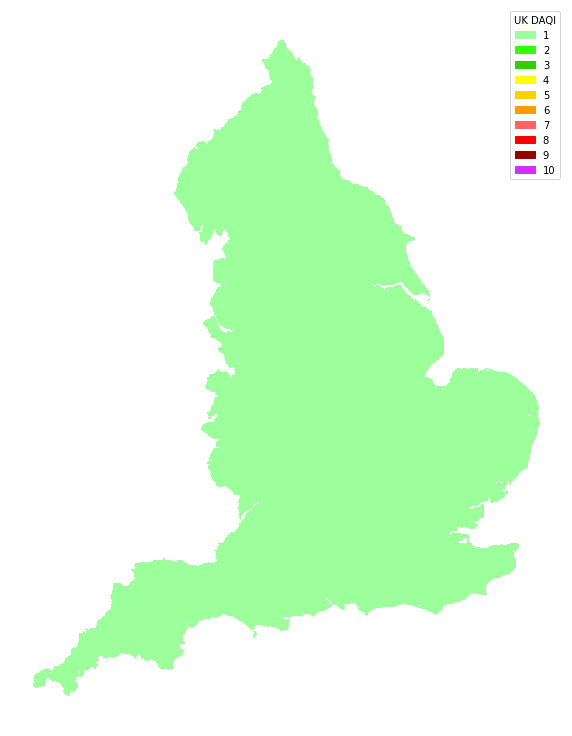

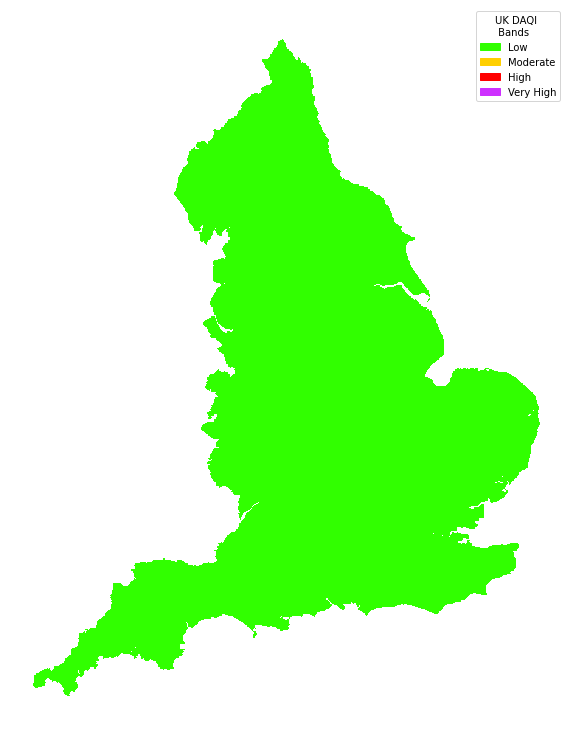

In [6]:
air_pollution_DF_daily_air_quality_index_uk = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(uk_complete_dataset, "no2", "no2 Prediction mean")
air_pollution_DF_daily_air_quality_index_uk = uk_grids.merge(air_pollution_DF_daily_air_quality_index_uk, on="UK Model Grid ID")

ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_index(air_pollution_DF_daily_air_quality_index_uk, "no2 AQI", "uk_2018_01_01_080000_air_quality_index")
ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_bands(air_pollution_DF_daily_air_quality_index_uk, "no2 Air Quality Index AQI Band", "uk_2018_01_01_080000_air_quality_bands")

### Global Model Visualisation

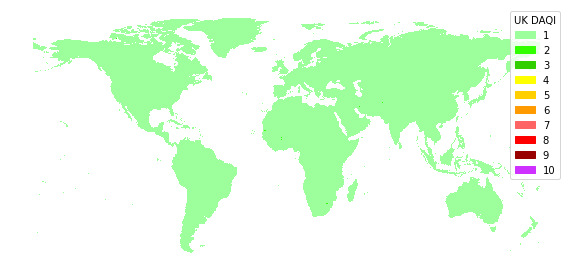

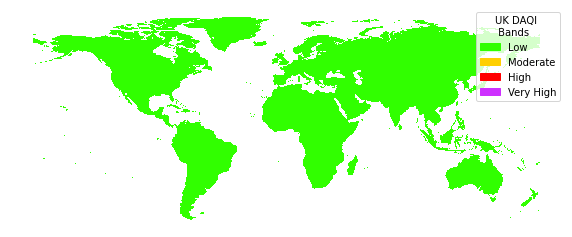

In [7]:
air_pollution_DF_daily_air_quality_index_global = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(global_complete_dataset, "no2", "no2")
air_pollution_DF_daily_air_quality_index_global = global_grids.merge(air_pollution_DF_daily_air_quality_index_global, on="Global Model Grid ID")

ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_index(air_pollution_DF_daily_air_quality_index_global, "no2 AQI", "global_2018_01_01_080000_air_quality_index")
ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_bands(air_pollution_DF_daily_air_quality_index_global, "no2 Air Quality Index AQI Band", "global_2018_01_01_080000_air_quality_bands")

# Load the typical day data for the UK
A core issue with the use of the data within this package is the amount of data that is avaliable (TBs of data). As such the use of the typical day, e.g. a typical monday in January at 8AM is provided to make conducting analysis more manageable. 
The dataset that is used in this tutorial is for Friday in January at midnight. 

In [8]:
uk_complete_typical_day_january_friday_midnight = ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(1, "Friday", 0)
uk_single_datapoint_typical_day_january_friday_midnight = ei_data.air_pollution_concentration_nearest_point_typical_day_united_kingdom(1, "Friday", 0,51.5, 0.12, uk_grids)
display(uk_complete_typical_day_january_friday_midnight)
display(uk_single_datapoint_typical_day_january_friday_midnight)

,Timestamp,UK Model Grid ID,nox Prediction mean,no2 Prediction mean,no Prediction mean,o3 Prediction mean,pm10 Prediction mean,pm2.5 Prediction mean,so2 Prediction mean,nox Prediction 0.05,...,pm10 Prediction 0.5,pm2.5 Prediction 0.5,so2 Prediction 0.5,nox Prediction 0.95,no2 Prediction 0.95,no Prediction 0.95,o3 Prediction 0.95,pm10 Prediction 0.95,pm2.5 Prediction 0.95,so2 Prediction 0.95
0,Month_1-Day_Friday-Hour_0,172550,4.017802,2.812367,0.349236,63.668754,7.188661,2.786551,0.463751,2.091108,...,7.146571,4.126741,0.960756,11.203108,8.686345,0.800055,78.310499,19.028497,13.972185,2.125544
1,Month_1-Day_Friday-Hour_0,172551,3.972543,2.694829,0.426442,65.739356,6.697701,2.970919,0.433914,1.850913,...,7.178484,5.057778,0.925270,11.545962,7.687859,0.859786,79.103834,19.570082,13.931100,1.938894
2,Month_1-Day_Friday-Hour_0,172552,4.700180,2.600203,0.374548,70.660628,6.503175,2.916194,0.460107,1.802128,...,7.519809,4.406307,0.851541,11.077235,7.759612,0.694030,80.454327,19.102461,14.097474,1.664532
3,Month_1-Day_Friday-Hour_0,172554,4.552362,3.045493,0.328104,72.515322,8.094753,3.514129,1.274053,1.991810,...,8.339492,4.901497,0.985152,11.500751,9.182634,0.605452,81.569765,20.842673,13.550126,1.849057
4,Month_1-Day_Friday-Hour_0,172555,3.869753,2.665616,0.392314,60.468751,8.619557,3.967909,1.277714,1.953122,...,8.240040,5.150398,1.388418,10.519783,9.098235,0.744974,77.554046,21.148254,14.299424,1.835284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,Month_1-Day_Friday-Hour_0,641063,8.222551,4.175528,0.131788,55.687207,11.830601,3.314833,0.234283,2.278441,...,9.366966,6.171990,1.243870,16.093022,11.333313,1.635394,64.831919,20.974808,12.484915,2.756452
355823,Month_1-Day_Friday-Hour_0,641069,8.990774,7.638318,0.195003,57.273293,11.979711,3.241447,0.499922,3.409901,...,9.000086,5.567575,1.373519,11.579877,11.553397,2.295638,71.721185,22.511852,11.298645,1.840405
355824,Month_1-Day_Friday-Hour_0,641078,10.187740,7.728428,0.106840,64.726175,11.828555,3.106486,0.435926,3.174422,...,9.921261,4.754073,1.223787,14.418216,10.067225,1.343596,72.829683,21.487459,11.235233,2.307508
355825,Month_1-Day_Friday-Hour_0,641079,6.195739,8.987267,0.182255,59.214336,10.903590,4.318315,0.529724,2.110240,...,9.824611,5.449190,1.755116,12.815938,13.405798,1.823801,71.062067,23.329093,10.905817,2.593097


,geometry Centroid,Timestamp,nox Prediction mean,no2 Prediction mean,no Prediction mean,o3 Prediction mean,pm10 Prediction mean,pm2.5 Prediction mean,so2 Prediction mean,nox Prediction 0.05,...,no Prediction 0.95,o3 Prediction 0.95,pm10 Prediction 0.95,pm2.5 Prediction 0.95,so2 Prediction 0.95,Predicition Latitude,Predicition Longitude,Distance,Requested Latitude,Requested Longitude
312545,POINT (13208.557099999976 6676831.988),Month_1-Day_Friday-Hour_0,18.221392,12.978385,1.426542,43.412705,8.665747,5.900429,1.313874,8.933272,...,4.777031,63.374378,20.752628,15.645429,1.702747,51.500416,0.118654,0.001408,51.5,0.12


In [9]:
air_pollution_DF_8am = ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom("2018-01-01 080000")
air_pollution_DF_9am = ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom("2018-01-01 090000")
air_pollution_DF_8am = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(air_pollution_DF_8am, "no2", "no2 Prediction mean")
air_pollution_DF_9am = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(air_pollution_DF_9am, "no2", "no2 Prediction mean")

air_pollution_DF_8am = uk_grids.merge(air_pollution_DF_8am, on="UK Model Grid ID")
air_pollution_DF_9am = uk_grids.merge(air_pollution_DF_9am, on="UK Model Grid ID")

# Visualise the change in the air pollution concentration and air quality index for NO2 between 8am and 9am on 1st January 2018.

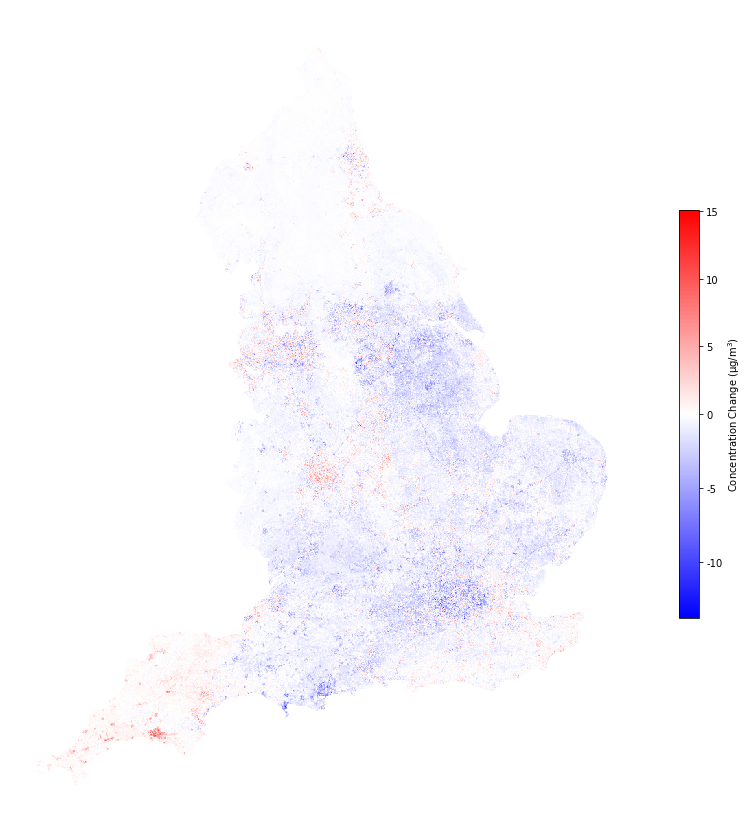

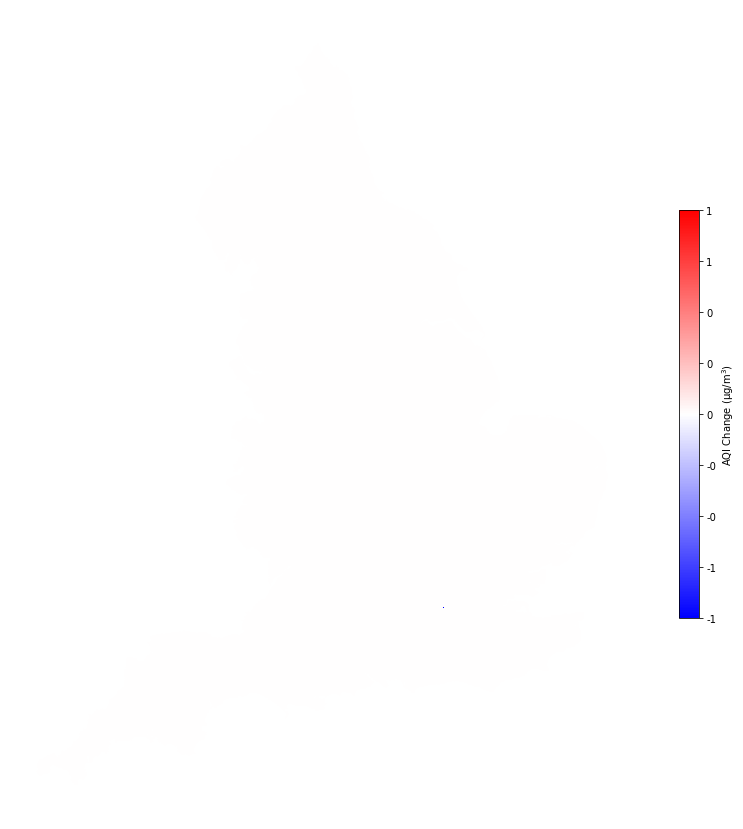

In [10]:
ei_air_pollution_functions.change_in_concentrations_visulisation(air_pollution_DF_8am, air_pollution_DF_9am, "no2 Prediction mean", "uk_concentration_change_between_8_9_am")
ei_air_pollution_functions.change_in_aqi_visulisation(air_pollution_DF_8am, air_pollution_DF_9am, "no2 AQI",  "uk_aqi_change_between_8_9_am")

# Visualising the changes in the air pollution concentrations across a number of timestamps. 

Alongside being able to visualise the changes in air pollution spatially, there is the ability to visualise them temporally, with an aggregate across all of the desired locations.
The example below gives the simple hypothetical scenario of changing the values based on simply doubling, or halving the concerntations. However a model could be plugged into this process as will be seen later. 

In [11]:
#Show the change in concentration line example 

#A single month should be used in the example code, with the list days being populated with the days to be analysed, out of ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month = 1 
days = ["Friday"]


#The baseline_DFs represent the DFs that will create the black link in the graph, with change_* being the DFs that contain the concentrations with some change, in this case the change_positive_DFs being the doubling of the concentrations and 
#change_negative_DFs being the halving of the concentrations. 
baseline_DFs = dict()
change_postive_DFs = dict()
change_negative_DFs = dict()
for day_of_week in days:
    
    #Create a nested list for each day
    baseline_DFs_single_day = dict()
    change_postive_DFs_single_day = dict()
    change_negative_DFs_single_day = dict()
    for hour in np.arange(0,24):
        
        #load in the typical day data of interest
        air_pollution_DF = ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(month, day_of_week, hour)
        
        #Standardise the column names
        air_pollution_DF = air_pollution_DF.rename(columns={"nox Prediction mean":"Model Predicition"})
        baseline_DFs_single_day[hour] = air_pollution_DF
        air_pollution_DF_change = air_pollution_DF.copy(deep=True)
        
        #Double all of the concentrations and add the DF to the corresponding list.
        air_pollution_DF_change["Model Predicition"] = air_pollution_DF_change["Model Predicition"] * 2
        change_postive_DFs_single_day[hour] = air_pollution_DF_change

        
        #Repeat the process but for the halving of the concentrations 
        air_pollution_DF_change = air_pollution_DF.copy(deep=True)
        air_pollution_DF_change["Model Predicition"] = air_pollution_DF_change["Model Predicition"] * 0.5
        change_negative_DFs_single_day[hour] = air_pollution_DF_change
        
      
    baseline_DFs[day_of_week] = baseline_DFs_single_day
    change_postive_DFs[day_of_week] = change_postive_DFs_single_day
    change_negative_DFs[day_of_week] = change_negative_DFs_single_day
    
    
display(change_postive_DFs["Friday"][0])

,Timestamp,UK Model Grid ID,Model Predicition,no2 Prediction mean,no Prediction mean,o3 Prediction mean,pm10 Prediction mean,pm2.5 Prediction mean,so2 Prediction mean,nox Prediction 0.05,...,pm10 Prediction 0.5,pm2.5 Prediction 0.5,so2 Prediction 0.5,nox Prediction 0.95,no2 Prediction 0.95,no Prediction 0.95,o3 Prediction 0.95,pm10 Prediction 0.95,pm2.5 Prediction 0.95,so2 Prediction 0.95
0,Month_1-Day_Friday-Hour_0,172550,8.035604,2.812367,0.349236,63.668754,7.188661,2.786551,0.463751,2.091108,...,7.146571,4.126741,0.960756,11.203108,8.686345,0.800055,78.310499,19.028497,13.972185,2.125544
1,Month_1-Day_Friday-Hour_0,172551,7.945086,2.694829,0.426442,65.739356,6.697701,2.970919,0.433914,1.850913,...,7.178484,5.057778,0.925270,11.545962,7.687859,0.859786,79.103834,19.570082,13.931100,1.938894
2,Month_1-Day_Friday-Hour_0,172552,9.400360,2.600203,0.374548,70.660628,6.503175,2.916194,0.460107,1.802128,...,7.519809,4.406307,0.851541,11.077235,7.759612,0.694030,80.454327,19.102461,14.097474,1.664532
3,Month_1-Day_Friday-Hour_0,172554,9.104724,3.045493,0.328104,72.515322,8.094753,3.514129,1.274053,1.991810,...,8.339492,4.901497,0.985152,11.500751,9.182634,0.605452,81.569765,20.842673,13.550126,1.849057
4,Month_1-Day_Friday-Hour_0,172555,7.739506,2.665616,0.392314,60.468751,8.619557,3.967909,1.277714,1.953122,...,8.240040,5.150398,1.388418,10.519783,9.098235,0.744974,77.554046,21.148254,14.299424,1.835284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,Month_1-Day_Friday-Hour_0,641063,16.445102,4.175528,0.131788,55.687207,11.830601,3.314833,0.234283,2.278441,...,9.366966,6.171990,1.243870,16.093022,11.333313,1.635394,64.831919,20.974808,12.484915,2.756452
355823,Month_1-Day_Friday-Hour_0,641069,17.981549,7.638318,0.195003,57.273293,11.979711,3.241447,0.499922,3.409901,...,9.000086,5.567575,1.373519,11.579877,11.553397,2.295638,71.721185,22.511852,11.298645,1.840405
355824,Month_1-Day_Friday-Hour_0,641078,20.375480,7.728428,0.106840,64.726175,11.828555,3.106486,0.435926,3.174422,...,9.921261,4.754073,1.223787,14.418216,10.067225,1.343596,72.829683,21.487459,11.235233,2.307508
355825,Month_1-Day_Friday-Hour_0,641079,12.391479,8.987267,0.182255,59.214336,10.903590,4.318315,0.529724,2.110240,...,9.824611,5.449190,1.755116,12.815938,13.405798,1.823801,71.062067,23.329093,10.905817,2.593097


### Visualise the changes based on the list of dataframe.

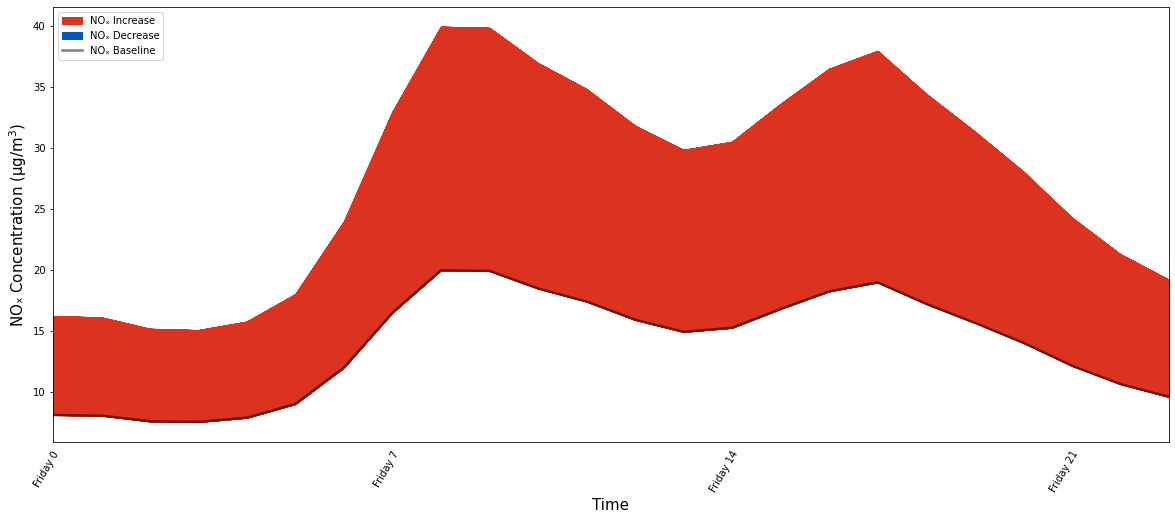

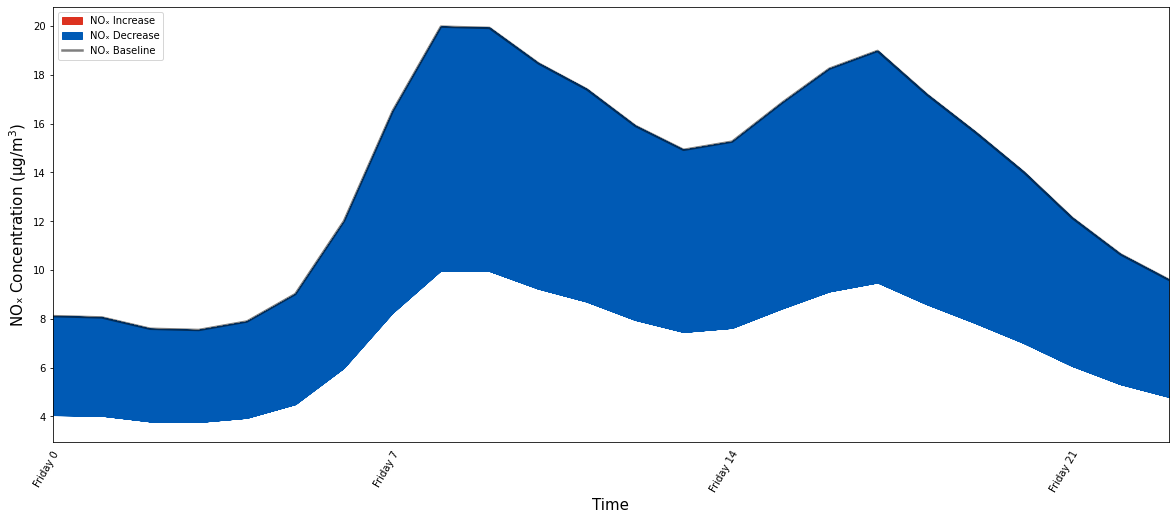

In [12]:
ei_air_pollution_functions.change_in_concentration_line("nox", baseline_DFs, change_postive_DFs, ["Friday"], list(np.arange(0,24)), "nox_change_line_positive")
ei_air_pollution_functions.change_in_concentration_line("nox", baseline_DFs, change_negative_DFs, ["Friday"], list(np.arange(0,24)), "nox_change_line_negative")

# Example of using the model to create new predictions based on a changing feature vector. 
Exploring the air pollution change when the wind gust doubles across all locations within the feature vector. 

In [13]:

#Read in a particular model of interest, and the typical day feature vector. 
climate_projection_model = ei_models.load_model_united_kingdom("0.5", "Climate Projections", "no2")
typical_day_feature_vector = ei_models.load_feature_vector_typical_day_united_kingdom(1, "Friday", 8, uk_grids)
display(typical_day_feature_vector)

typical_day_feature_vector_climate_change = typical_day_feature_vector.copy(deep=True)

#Double the wind gusts within the feature vector DF.
typical_day_feature_vector_climate_change["instantaneous_10m_wind_gust"] = typical_day_feature_vector_climate_change["instantaneous_10m_wind_gust"] * 2

,UK Model Grid ID,geometry,geometry Centroid,Bicycle Score,Car and Taxi Score,Bus and Coach Score,LGV Score,HGV Score,Road Infrastructure Distance residential,Road Infrastructure Distance footway,...,downward_uv_radiation_at_the_surface,instantaneous_10m_wind_gust,surface_pressure,total_cloud_cover,total_column_rain_water,instantaneous_surface_sensible_heat_flux,Month Number,Day of Week Number,Hour Number,Week Number
0,3327,"POLYGON ((-627291.443 6441331.988, -626291.443...",POINT (-626791.443 6440831.988),10007.108828,1.216621e+06,13488.654831,139514.957166,93770.533720,2753.679317,286.418827,...,0.003397,14.288938,101019.539174,0.759622,0.010557,-8.681998,1,4,8,4.103226
1,3328,"POLYGON ((-627291.443 6442331.988, -626291.443...",POINT (-626791.443 6441831.988),16487.023986,1.251066e+06,14900.079318,135404.950156,58480.551012,3137.131517,409.868884,...,0.003397,14.277297,101016.451755,0.759694,0.010568,-8.465279,1,4,8,4.103226
2,3329,"POLYGON ((-627291.443 6443331.988, -626291.443...",POINT (-626791.443 6442831.988),1833.713829,1.190179e+05,1461.536137,12536.584342,3939.197720,3754.355129,481.664337,...,0.003397,14.265657,101013.364711,0.759765,0.010579,-8.248586,1,4,8,4.103226
3,3330,"POLYGON ((-627291.443 6440331.988, -626291.443...",POINT (-626791.443 6439831.988),0.000000,0.000000e+00,0.000000,0.000000,0.000000,2647.109137,767.115392,...,0.003397,14.300580,101022.626968,0.759550,0.010546,-8.898744,1,4,8,4.103226
4,3331,"POLYGON ((-627291.443 6439331.988, -626291.443...",POINT (-626791.443 6438831.988),1732.050177,2.104103e+05,2331.433356,24132.360890,16209.862362,2848.071213,912.665169,...,0.003397,14.312224,101025.715136,0.759478,0.010535,-9.115515,1,4,8,4.103226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,641080,"POLYGON ((195708.557 6853331.988, 196708.557 6...",POINT (196208.557 6852831.988),13596.817324,9.787431e+05,14690.322791,136780.834557,79930.798957,829.455816,175.305489,...,141.153534,10.584731,101023.601012,0.620399,0.000223,-11.715386,1,4,8,4.103226
355823,641081,"POLYGON ((195708.557 6854331.988, 196708.557 6...",POINT (196208.557 6853831.988),24380.837990,1.715744e+06,25835.750527,239476.545090,139234.270056,726.611213,177.362284,...,140.589823,10.584521,101022.887259,0.620537,0.000221,-11.610241,1,4,8,4.103226
355824,641082,"POLYGON ((195708.557 6855331.988, 196708.557 6...",POINT (196208.557 6854831.988),4411.078771,2.874862e+05,4311.416429,40083.964291,22936.132911,820.188165,215.757040,...,140.026182,10.584310,101022.173596,0.620676,0.000220,-11.505109,1,4,8,4.103226
355825,641083,"POLYGON ((195708.557 6856331.988, 196708.557 6...",POINT (196208.557 6855831.988),1233.091034,1.017223e+05,637.955414,21469.638105,10085.813845,831.314410,1064.281788,...,139.462612,10.584100,101021.460022,0.620814,0.000219,-11.399990,1,4,8,4.103226


In [14]:
#Calculate the air pollution predicitons for the old and the new feature vector and describe the data, highlighting the changes between the scenarios. 
display(ei_models.make_concentration_predicitions_united_kingdom(climate_projection_model, typical_day_feature_vector, ei_models.get_model_feature_vector("Climate Projections")).describe())
display(ei_models.make_concentration_predicitions_united_kingdom(climate_projection_model, typical_day_feature_vector_climate_change, ei_models.get_model_feature_vector("Climate Projections")).describe())

,UK Model Grid ID,Model Predicition
count,355827.000000,355827.000000
mean,443642.723430,17.705083
std,136366.465735,13.999510
min,3327.000000,1.048530
25%,361150.500000,7.697468
50%,462899.000000,12.356059
75%,552098.500000,23.883857
max,641084.000000,166.710073


,UK Model Grid ID,Model Predicition
count,355827.000000,355827.000000
mean,443642.723430,13.828622
std,136366.465735,10.251087
min,3327.000000,1.110209
25%,361150.500000,6.548604
50%,462899.000000,9.951060
75%,552098.500000,18.418100
max,641084.000000,148.069112


# Access Up to Date OpenStreetMaps data

In [15]:
#Access the amenities of interest, in this case hospitals. 
bbox = [51.29, -0.51, 51.69, 0.33]  # Example bounding box around Berlin
amenities_gdf = ei_data.get_amenities_as_geodataframe("hospital", *bbox)
display(amenities_gdf)

#Access the highways of interest, in this case motorways.
bbox = [49.8, -10.5, 60.9, 2.2]
highways_gdf = ei_data.get_highways_as_geodataframe("motorway", *bbox)
highways_gdf.crs=4326 
highways_gdf = highways_gdf.to_crs(3395)
display(highways_gdf)

,name,geometry
0,National Hospital for Neurology and Neurosurgery,POINT (-0.12236 51.52223)
1,Priory Hospital,POINT (-0.11830 51.63206)
2,Bridge Lane Health Centre,POINT (-0.16632 51.47327)
3,Royal Home and Hospital for Incurables,POINT (-0.10707 51.42309)
4,Chelsfield Park Hospital,POINT (0.13167 51.35826)
...,...,...
220,Meadows West Park Hospital,POINT (-0.30032 51.33990)
221,Newham Centre for Mental Health,POINT (0.03881 51.52028)
222,Maudsley Hospital,POINT (-0.09026 51.46904)
223,London Clinic,POINT (-0.14997 51.52290)


,name,geometry,highway,source
0,Unknown,"LINESTRING (-194749.820 6867752.651, -194547.3...",motorway,osm
1,Unknown,"LINESTRING (-192546.852 6864775.738, -192550.5...",motorway,osm
2,Unknown,"LINESTRING (-378563.970 7510092.540, -378580.2...",motorway,osm
3,Unknown,"LINESTRING (-380180.050 7513764.306, -380104.9...",motorway,osm
4,Unknown,"LINESTRING (-379081.772 7511845.266, -379154.3...",motorway,osm
...,...,...,...,...
12950,Unknown,"LINESTRING (-387624.308 7600036.880, -387613.5...",motorway,osm
12951,Unknown,"LINESTRING (-442022.425 7548849.938, -442015.6...",motorway,osm
12952,Unknown,"LINESTRING (-266763.467 7037814.338, -266703.6...",motorway,osm
12953,Unknown,"LINESTRING (-254461.773 7038058.038, -254375.4...",motorway,osm


In [16]:

#Add into the feature vector a new distance feature vector element for a new moroway onto the exists motorway network. 
start_point = [0.071113, 52.231664]
end_point = [1.3, 52.6]
uk_grids_centroid = uk_grids.copy(deep=True)
uk_grids_centroid["geometry"] = uk_grids_centroid["geometry"].centroid
new_data, highways_user_added = ei_data.calculate_new_metrics_distance_total(highways_gdf, "motorway", start_point, end_point, uk_grids_centroid, uk_grids)

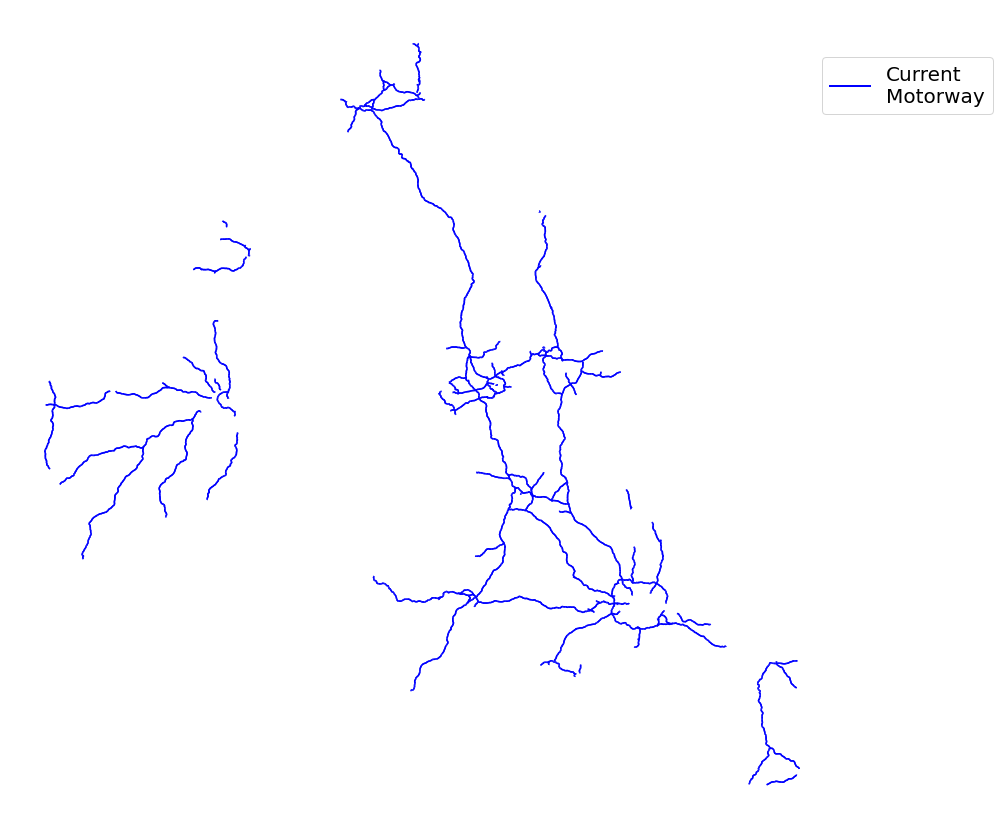

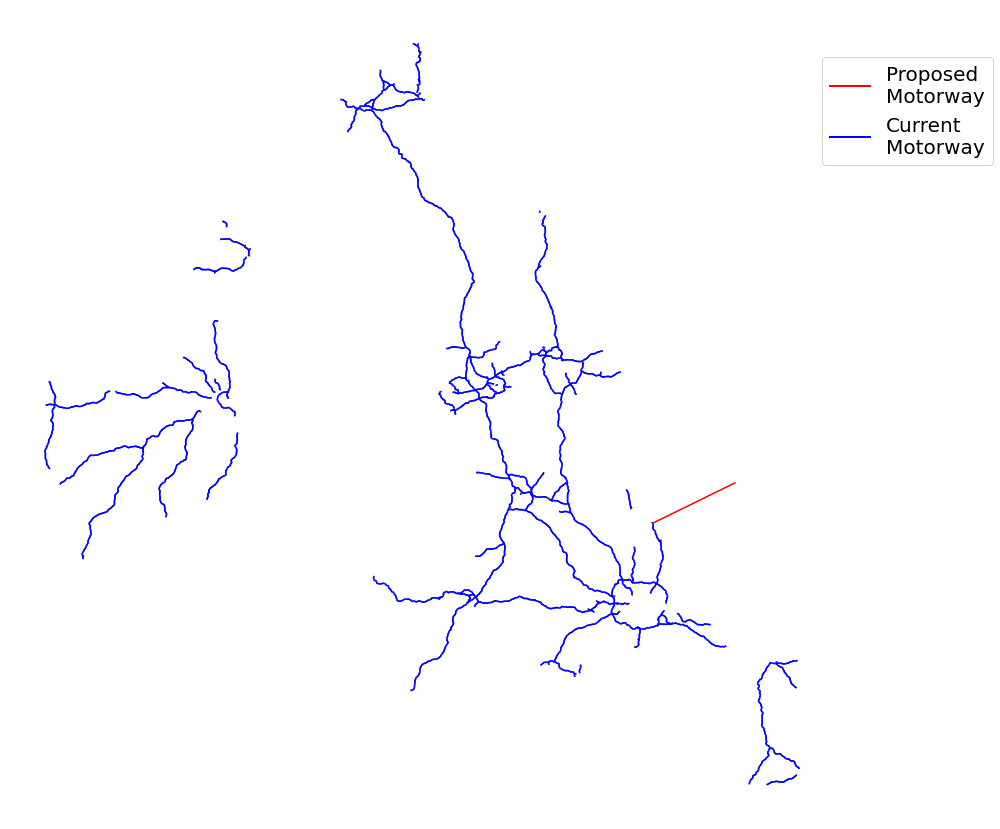

In [17]:
#visualise the new motorway segment (red) alongside the currently existing network (blue)
color_map = {"osm":"blue", "User Added":"red"}

fig, axes = plt.subplots(1, figsize=(15,15))
highways_gdf.plot(ax=axes, color=highways_user_added['source'].map(color_map))
axes.axis("off")
# Create custom legend handles
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='blue', lw=2, label='Current\nMotorway'),
]

# Add the custom legend to the axis
axes.legend(handles=legend_elements, fontsize=20, bbox_to_anchor=(1.2,0.95), markerscale=2)


fig, axes = plt.subplots(1, figsize=(15,15))
highways_user_added.plot(ax=axes, color=highways_user_added['source'].map(color_map))
axes.axis("off")
# Create custom legend handles
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='red', lw=2, label='Proposed\nMotorway'),
    matplotlib.lines.Line2D([0], [0], color='blue', lw=2, label='Current\nMotorway'),
]

# Add the custom legend to the axis
axes.legend(handles=legend_elements, fontsize=20, bbox_to_anchor=(1.2,0.95), markerscale=2)

#Load in the different models. 
air_pollutants = ["no2", "o3", "pm10", "pm2.5", "so2"]
complete_models = dict()
for air_pollutant in air_pollutants:
    complete_models[air_pollutant] = ei_models.load_model_united_kingdom("0.5", "Transport Infrastructure Policy", air_pollutant)

typical_day_feature_vector = ei_models.load_feature_vector_typical_day_united_kingdom(1, "Friday", 8, uk_grids)

In [18]:
# The same process as above, is conducted with a real model, and the example of changing the motorway network analysed in the feature vector. 
baseline_DFs_air_pollutant = dict()
change_DFs_air_pollutant = dict()
for air_pollutant in air_pollutants:
    month = 1 
    days = ["Friday"]
    baseline_DFs = dict()
    changeDFs = dict()
    for day_of_week in days:
        display(day_of_week)
        baseline_DFs_single_day = dict()
        change_DFs_single_day = dict()
        for hour in np.arange(0,24):
            
            #Read in the relevant feature vector for the desired timestamp.
            feature_vector = ei_models.load_feature_vector_typical_day_united_kingdom(month, day_of_week, hour, uk_grids)

            #Create the baseline based on the current data
            air_pollution_estimation_baseline = ei_models.make_concentration_predicitions_united_kingdom(complete_models[air_pollutant], feature_vector, ei_models.get_model_feature_vector("Transport Infrastructure Policy"))
            air_pollution_estimation_baseline = air_pollution_estimation_baseline.rename(columns={"Model Predicition":"Model Predicition Baseline"})
            
            #Modify the feature vector to include details of the new motorway segment. 
            feature_vector_modified = ei_data.replace_feature_vector_column(feature_vector, new_data, "Road Infrastructure Distance motorway")
            feature_vector_modified = ei_data.replace_feature_vector_column(feature_vector_modified, new_data, "Total Length motorway")
            
            #Calculate the new air pollution concentrations based on the modified feature vector. 
            air_pollution_estimation_modified = ei_models.make_concentration_predicitions_united_kingdom(complete_models[air_pollutant], feature_vector_modified, ei_models.get_model_feature_vector("Transport Infrastructure Policy"))
            air_pollution_estimation_modified = air_pollution_estimation_modified.rename(columns={"Model Predicition":"Model Predicition Modified"})
            
            air_pollution_estimation = air_pollution_estimation_modified.merge(air_pollution_estimation_baseline, on="UK Model Grid ID")
            
            air_pollution_estimation_difference = air_pollution_estimation[air_pollution_estimation["Model Predicition Baseline"] != air_pollution_estimation["Model Predicition Modified"]]
            
            baseline_DFs_single_day[hour] = air_pollution_estimation_difference[["UK Model Grid ID", "Model Predicition Baseline"]].rename(columns={"Model Predicition Baseline": "Model Predicition"})
            change_DFs_single_day[hour] = air_pollution_estimation_difference[["UK Model Grid ID", "Model Predicition Modified"]].rename(columns={"Model Predicition Modified": "Model Predicition"})

        baseline_DFs[day_of_week] = baseline_DFs_single_day
        changeDFs[day_of_week] = change_DFs_single_day
    baseline_DFs_air_pollutant[air_pollutant] = baseline_DFs
    change_DFs_air_pollutant[air_pollutant] = changeDFs

'Friday'

'Friday'

'Friday'

'Friday'

'Friday'

# Visualise the changes in air pollution across a typical friday due to the placement of the new motorway segment 

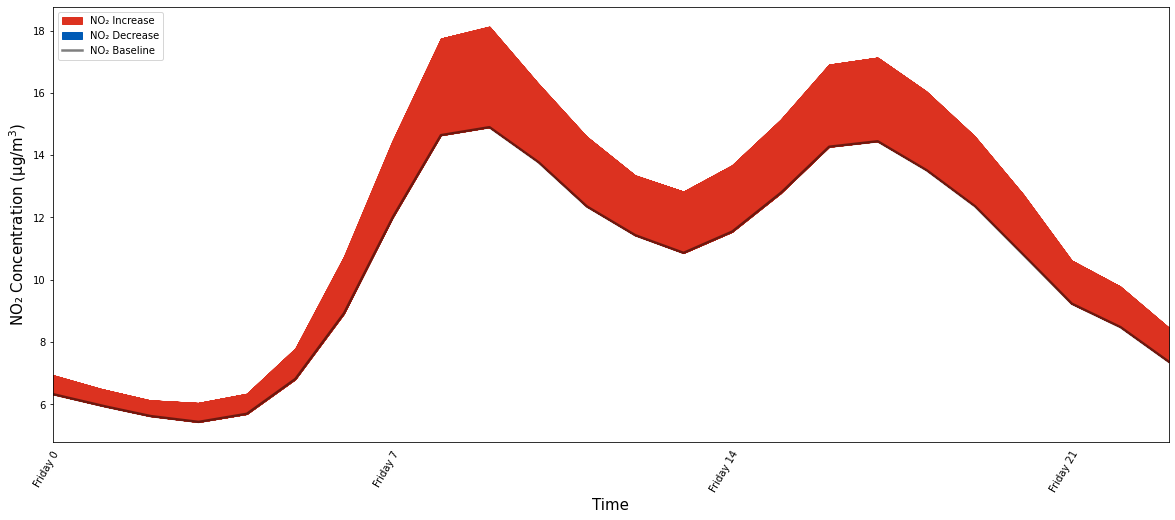

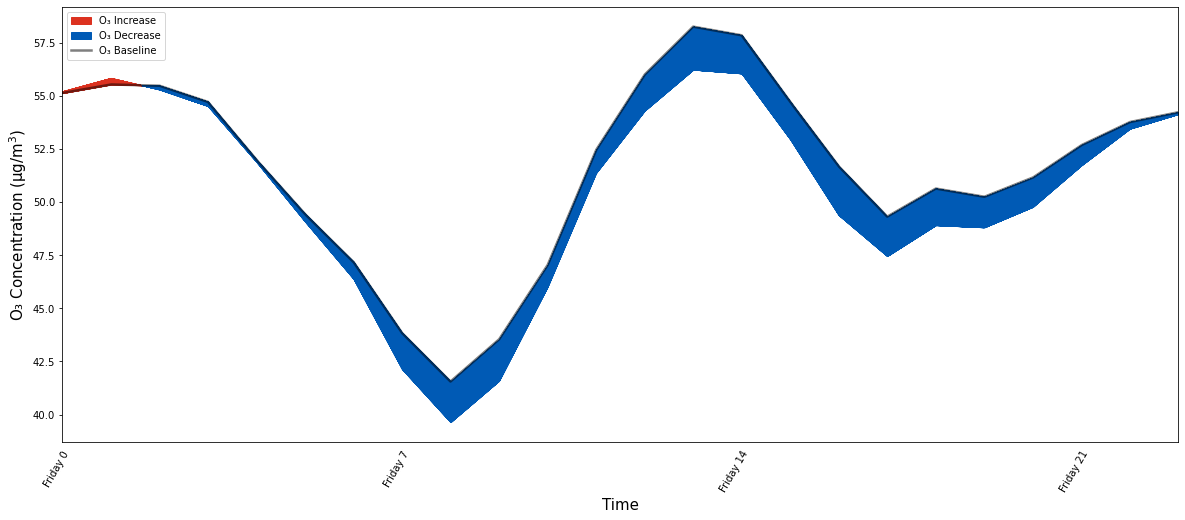

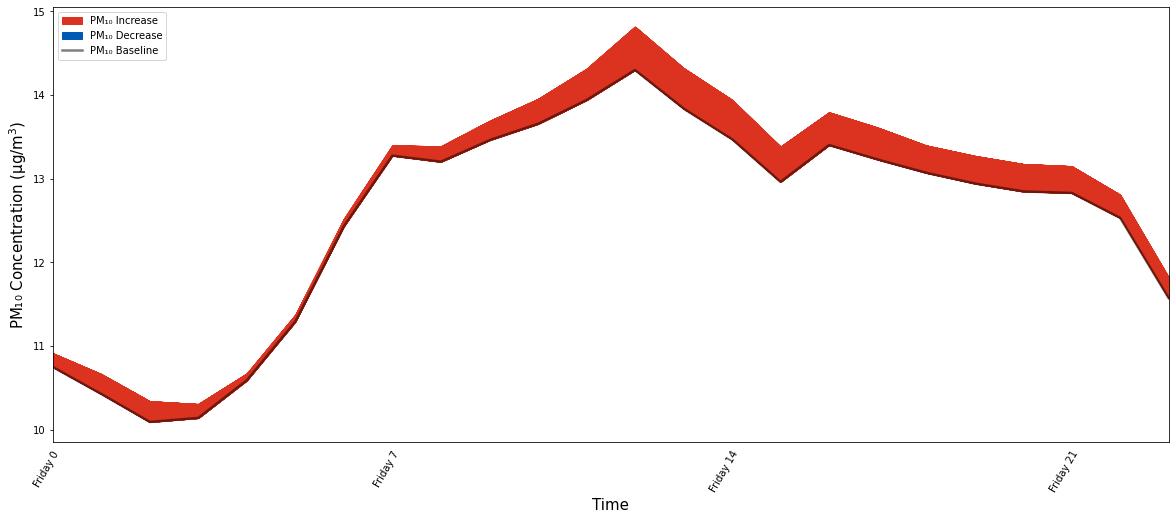

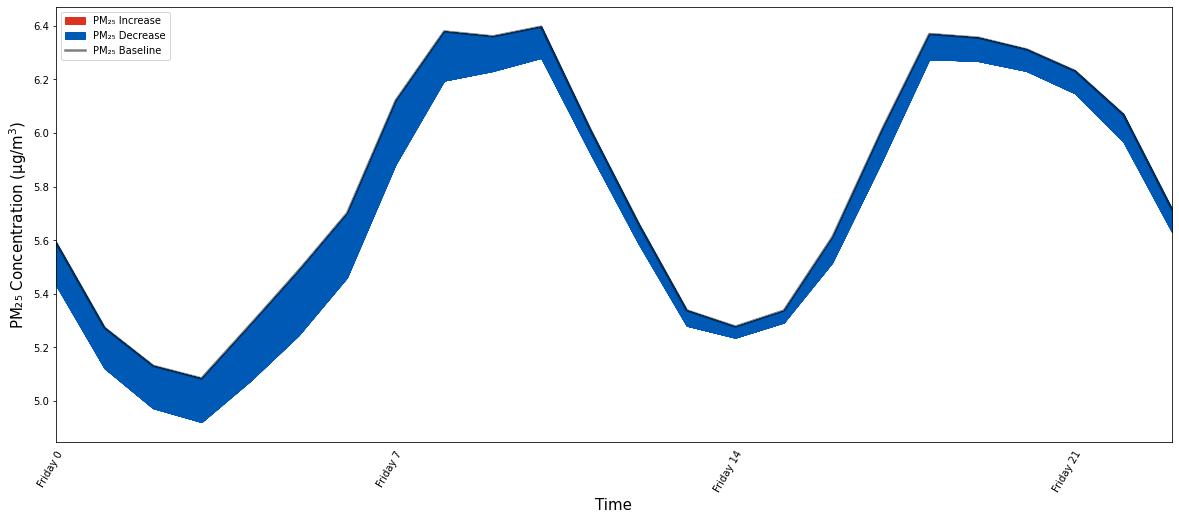

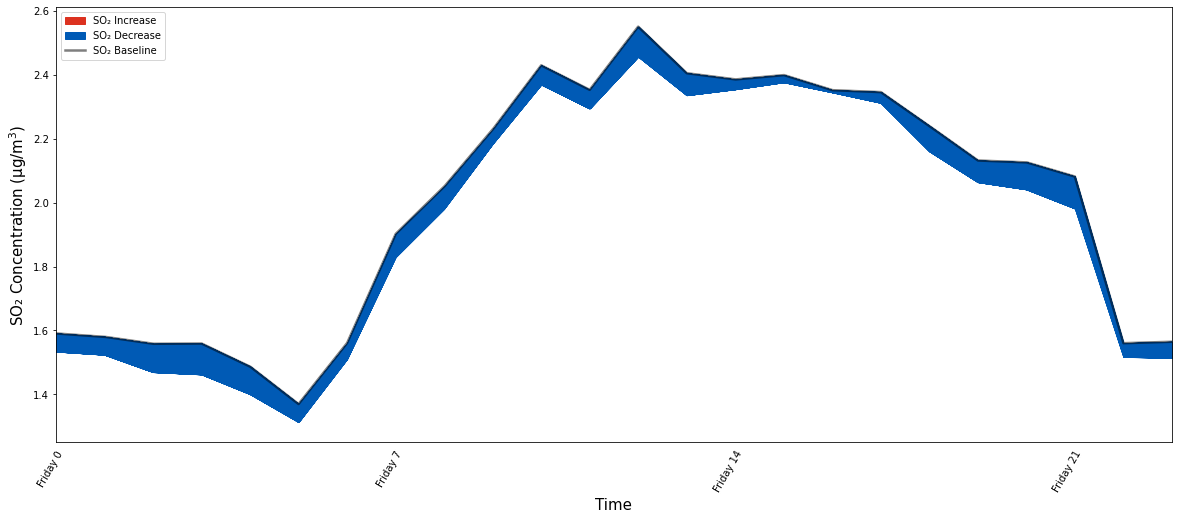

In [19]:
chage_concentration_lines_figs = dict()  
for air_pollutant in air_pollutants:
    chage_concentration_lines_figs[air_pollutant] = ei_air_pollution_functions.change_in_concentration_line(air_pollutant, baseline_DFs_air_pollutant[air_pollutant], change_DFs_air_pollutant[air_pollutant], ["Friday"], list(np.arange(0,24)), "motorway_addition_"+air_pollutant)